<a href="https://colab.research.google.com/github/Ahmed-Adham03/Ahmed-Adham03/blob/main/HeartDiseasePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.model_selection import GridSearchCV

In [20]:
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

In [21]:
grid_search.fit(scaler.transform(X_train_encoded), y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [23]:
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('heart.csv')


In [4]:
#Displaying information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Displaying data description
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Remove rows with any missing values
data.dropna(inplace=True)

# Remove columns with more than 50% missing values
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

In [7]:
#print the mean of age

age_mean = data['Age'].mean()
print ("The mean of age is: ", age_mean)

The mean of age is:  53.510893246187365


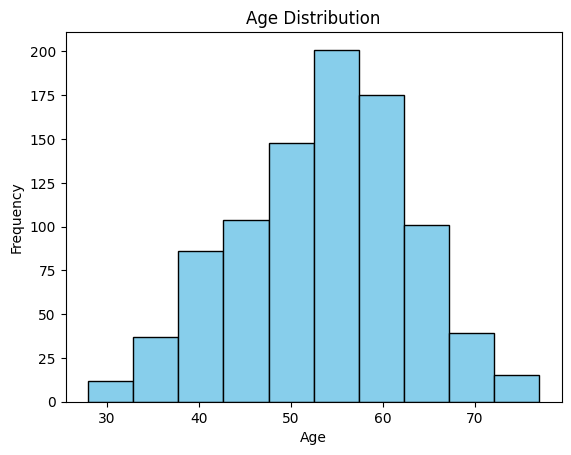

In [8]:
import matplotlib.pyplot as plt

# Plot histogram for the age column
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [9]:
# Get value counts for the sex column
sex_counts = data['Sex'].value_counts()
print(sex_counts)


Sex
M    725
F    193
Name: count, dtype: int64


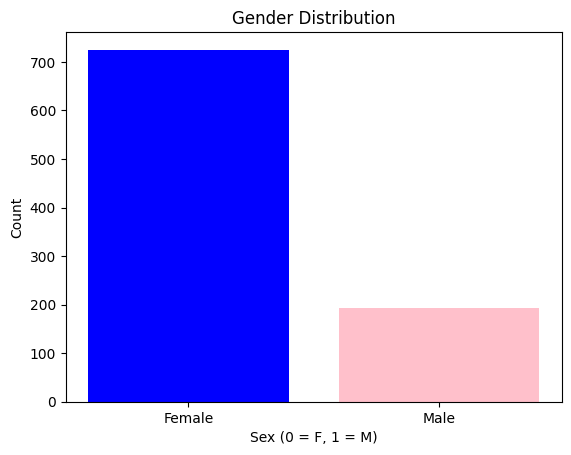

In [10]:
# Get value counts for the sex column
sex_counts = data['Sex'].value_counts()

# Plot bar chart for gender distribution
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.title("Gender Distribution")
plt.xlabel("Sex (0 = F, 1 = M)")
plt.ylabel("Count")
plt.xticks(sex_counts.index, ['Female', 'Male'])  # Set x-ticks to meaningful labels
plt.show()


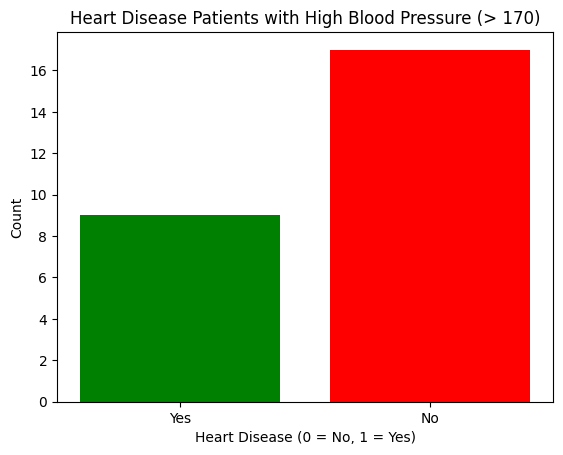

In [11]:


# Filter patients with high blood pressure (> 170)
high_bp_patients = data[data['RestingBP'] > 170]

# Count the occurrences of heart disease in this group
heart_disease_counts = high_bp_patients['HeartDisease'].value_counts()

# Plot bar chart
plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['red', 'green'])
plt.title("Heart Disease Patients with High Blood Pressure (> 170)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(heart_disease_counts.index, ['No', 'Yes'])  # Set x-ticks to meaningful labels
plt.show()


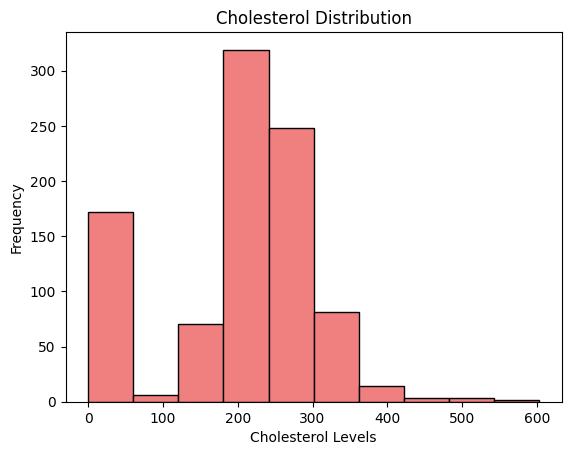

In [12]:


# Plot histogram for the cholesterol column
plt.hist(data['Cholesterol'], bins=10, color='lightcoral', edgecolor='black')
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol Levels")
plt.ylabel("Frequency")
plt.show()


In [13]:
#defining features and target

X = data[['Age', 'Cholesterol','ChestPainType', 'FastingBS','RestingECG','ExerciseAngina','Sex','MaxHR','Oldpeak','ST_Slope']]
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [14]:

# Create a copy of X_train to avoid modifying the original DataFrame
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# One-hot encode categorical features for X_train and X_test
categorical_features = [ 'RestingECG', 'ExerciseAngina','Sex','ChestPainType','ST_Slope']  # List your categorical columns
for feature in categorical_features:
    # Get dummies for X_train
    dummies_train = pd.get_dummies(X_train[feature], prefix=feature, drop_first=True)
    X_train_encoded = pd.concat([X_train_encoded, dummies_train], axis=1)
    X_train_encoded.drop(columns=[feature], inplace=True)

    # Get dummies for X_test using the same categories as X_train
    dummies_test = pd.get_dummies(X_test[feature], prefix=feature, drop_first=True)
    X_test_encoded = pd.concat([X_test_encoded, dummies_test], axis=1)
    X_test_encoded.drop(columns=[feature], inplace=True)

scaler = StandardScaler()
# Fit the scaler on the encoded data
scaler.fit(X_train_encoded)

StandardScaler()

In [15]:

# Create a copy of X_train to avoid modifying the original DataFrame
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# One-hot encode categorical features for X_train and X_test
categorical_features = [ 'RestingECG', 'ExerciseAngina','Sex','ChestPainType','ST_Slope']  # List your categorical columns
for feature in categorical_features:
    # Get dummies for X_train
    dummies_train = pd.get_dummies(X_train[feature], prefix=feature, drop_first=True)
    X_train_encoded = pd.concat([X_train_encoded, dummies_train], axis=1)
    X_train_encoded.drop(columns=[feature], inplace=True)

    # Get dummies for X_test using the same categories as X_train
    dummies_test = pd.get_dummies(X_test[feature], prefix=feature, drop_first=True)
    X_test_encoded = pd.concat([X_test_encoded, dummies_test], axis=1)
    X_test_encoded.drop(columns=[feature], inplace=True)

scaler = StandardScaler()
# Fit the scaler on the encoded data
scaler.fit(X_train_encoded)

StandardScaler()

In [26]:
param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': [0.01, 0.1, 1, 10],
            'kernel': ['rbf', 'linear', 'poly']
        }

In [28]:
y_pred_best = best_svm_model.predict(scaler.transform(X_test_encoded))
accuracy_best = accuracy_score(y_test, y_pred_best) # Remove the extra indentation from this line
print(f"Accuracy of the best SVM model: {accuracy_best:.2f}")

Accuracy of the best SVM model: 0.87
